# About

The notebook contains the plots used in the official supernest publication. Be aware that the plots may take a long time to generate... Some parallelism is utilised, but not MPI-based parallelism and concurrency issues may arise. 

The cells in this notebook are standalone, so that generating each individual plot is easier. 

This notebook demonstrates the altenative object-oriented framework, that uses supernest's core logic and simplified interface to produce a more seamless experience for PolyChord users. Not all features included in the framework are included in `core`. 

## Evidence estimate  Histograms


PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

 ____________________________________________________ 
|                                                    |
| ndead  =         3367                              |
| log(Z) =          -62.12279 +/-            1.05748 |
|____________________________________________________|

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

 ____________________________________________________ 
|                                                    |
| ndead  =           52                              |
| log(Z) =          -62.73597 +/-            0.01885 |
|____________________________________________________|
Warning, unable to proceed after     51: failed spawn events
all the input arrays must have same n

/home/app/.local/lib/python3.9/site-packages/anesthetic/read/polychordreader.py:13: UserWarning: loadtxt: Empty input file: "./chains/tgd_phys_live-birth.txt"
  _data = np.loadtxt(self.phys_live_birth_file)
/mnt/Archive/Git/sspr/supernest/framework/gaussian_models.py:155: RuntimeWarning: divide by zero encountered in true_divide
  ret -= log(pi * sigma ** 2 / 2 / b) / 2
/mnt/Archive/Git/sspr/supernest/framework/gaussian_models.py:158: RuntimeWarning: divide by zero encountered in log
  ret -= log(db - da)
/mnt/Archive/Git/sspr/supernest/framework/gaussian_models.py:158: RuntimeWarning: invalid value encountered in subtract
  ret -= log(db - da)
/mnt/Archive/Git/sspr/supernest/framework/gaussian_models.py:139: RuntimeWarning: overflow encountered in double_scalars
  return m.mu + sqrt(2 / beta) * sigma * ret
/mnt/Archive/Git/sspr/supernest/framework/gaussian_models.py:139: RuntimeWarning: invalid value encountered in multiply
  return m.mu + sqrt(2 / beta) * sigma * ret


 ____________________________________________________ 
|                                                    |
| ndead  =          940                              |
| log(Z) =          -62.60071 +/-            0.11129 |
|____________________________________________________|

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

 ____________________________________________________ 
|                                                    |
| ndead  =          953                              |
| log(Z) =          -62.66518 +/-            0.11220 |
|____________________________________________________|

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

 ____________________________________________________ 
|                                          

/home/app/.local/lib/python3.9/site-packages/anesthetic/read/polychordreader.py:13: UserWarning: loadtxt: Empty input file: "./chains/mix_phys_live-birth.txt"
  _data = np.loadtxt(self.phys_live_birth_file)


NameError: name 'tikzplotlib' is not defined

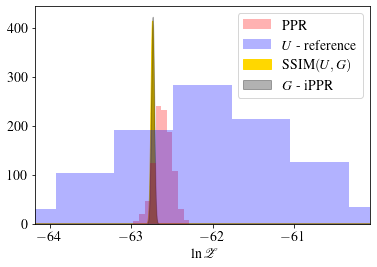

In [1]:
import matplotlib.pyplot as plt
# import tikzplotlib
from matplotlib import rc
# from mpi4py import MPI
from numpy import array, sqrt, exp, pi, linspace

from supernest.framework.gaussian_models import (
    PowerPosteriorPrior, BoxUniformPrior, GaussianPeakedPrior, ResizeablePrior)
from supernest.framework.mixtures import StochasticMixtureModel

rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)
plt.rcParams["font.size"] = 14

a = 6 * 10 ** 8
arr_bounds = (array([-a, -a, -a]), array([a, a, a]))
bounds = (-a, a)
mu = array([1, 2, 3])
cov = array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

args = [bounds, mu, cov]
kwargs = {
    'resume': False,
    'live_points': 50,
}

ppr_arr_bounds = PowerPosteriorPrior(arr_bounds, mu, cov, file_root='ppr_arr_bounds')
ppr = PowerPosteriorPrior(*args, file_root='ppr')
tgd = GaussianPeakedPrior(*args, file_root='tgd')
bun = BoxUniformPrior(*args, file_root='bun')
run = ResizeablePrior(*args, file_root='run')

mix = StochasticMixtureModel([bun, tgd], file_root='mix')

q0, reference = bun.nested_sample(**kwargs)
qg, gaussian = tgd.nested_sample(**kwargs)
qp, power = ppr.nested_sample(**kwargs)
qpp, power_arr_bounds = ppr_arr_bounds.nested_sample(**kwargs)
qm, samples = mix.nested_sample(**kwargs)

hist_samples = 1000

z_lower = min([x.logZ - x.logZerr for x in [ q0, qg, qp, qpp, qm]]) - 1
z_upper = max([x.logZ + x.logZerr for x in [ q0, qg, qp, qpp, qm]]) + 1


def overlay_gaussian(mean, sigma, **fill_kwargs):
    x = linspace(z_lower, z_upper, hist_samples)
    plt.fill_between(x, 0, hist_samples / 50 / (sigma * sqrt(2 * pi)) *
                     exp(- (x - mean) ** 2 / (2 * sigma ** 2)), **fill_kwargs)




# plt.hist(samples.logZ(hist_samples), label=r'mix\((U, G)\)', alpha=1)
overlay_gaussian(qm.logZ, qm.logZerr, label=r'SSIM\((U, G)\)', hatch='//', color='gold')
# This would contain the right histogram, except polychord
# terminates before generating any usable runs.
plt.hist(power.logZ(hist_samples), label='PPR', alpha=0.3, color='red')
# plt.hist(gaussian.logZ(hist_samples), label='\(G\) - true posterior', alpha=0.3, )
overlay_gaussian(qg.logZ, qg.logZerr,
                 label=r'$G$ - iPPR', alpha=0.3, color='black')
plt.hist(reference.logZ(hist_samples), label=r'\(U\) - reference',
         alpha=0.3, fill=True, color='blue')
plt.xlim(z_lower, z_upper)
plt.xlabel(r'\(\ln {\cal Z}\)')
plt.legend()
tikzplotlib.save('../illustrations/histograms.tex')
plt.show()


## Benchmarks

In [3]:
import matplotlib.pyplot as plt
import tikzplotlib
from matplotlib import rc
from numpy import array, mean, std

# Uncomment if you have MPI installed
# from mpi4py import MPI
# print(MPI)

from supernest.framework.gaussian_models import (PowerPosteriorPrior,
                                                  GaussianPeakedPrior,
                                                  BoxUniformPrior)
from supernest.framework.mixtures import StochasticMixtureModel
from supernest.framework.offset_model import OffsetModel

from tqdm import tqdm

class Series:
    def __init__(self, model, style, label):
        self.model = model
        self.style = style
        self.label = label
        self.data = None

    def __str__(self):
        return f'{self.model}\n{self.style} - {self.label}'

    def __repr__(self):
        return self.__str__()

try:
    from pathos.multiprocessing import ProcessPool as Pool


    def parmap(f, x):
        with Pool() as p:
            result = p.map(f, x)
        return result

except ImportError:
    try:
        from multiprocessing.dummy import Pool as ThreadPool


        def parmap(f, x):
            with ThreadPool() as pool:
                results = pool.map(f, x)
            return results

    except ImportError:
        def parmap(f, x):
            return map(f, x)


rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)
plt.rcParams["font.size"] = 14
plt.rcParams["errorbar.capsize"] = 4

bounds = (-6 * 10 ** 8, 6 * 10 ** 8)
mu = array([1, 2, 3])
cov = array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
args = [bounds, mu, cov]

coincidingSeries = {
    'uniform': Series(BoxUniformPrior(*args), '.', r'$U$'),
    'ppr': Series(PowerPosteriorPrior(*args), '+', r'$PPR$'),
    'mix': Series(StochasticMixtureModel(
        [BoxUniformPrior(*args),
         GaussianPeakedPrior(*args)]), 'x', r'mix\((U, G)\)'),
    'gauss': Series(GaussianPeakedPrior(*args), 'o', r'$G$')
}


def count_log_like_calls(model, repeats, **kwargs):
    fr = kwargs.pop('file_root')
    outs = parmap(lambda r: model.nested_sample(
        **kwargs, file_root=(fr + '{}'.format(r))), range(repeats))
    result = [out[0].nlike for out in outs]
    print(result)
    return result


def bench(repeats, n_like, series):
    rv = {}
    config = {'resume': False}
    for k in tqdm(series):
        print('Running {}'.format(k))
        log_like_calls = [count_log_like_calls(series[k].model,
                                               repeats,
                                               **config,
                                               live_points=nl,
                                               file_root='{}{}'.format(k, nl))
                          for nl in n_like]
        rv[k] = log_like_calls
    return rv


live_points = [10, 30, 40, 50, 55, 60, 65, 70]


def compare(runs, n_like, series):
    for k in series:
        x_data = n_like
        y_data = array([mean(x) for x in runs[k]])
        y_err = array([std(x) for x in runs[k]])
        print('x={}, y={}, y_err={}'.format(x_data, y_data, y_err))
        plt.errorbar(x_data, y_data, y_err,
                     label=series[k].label, marker=series[k].style,
                     markersize=8)
    plt.xlabel(r'\(n_{live}\)')
    plt.ylabel(r'\# of \({\cal L}\) evaluations')
    plt.legend()
    tikzplotlib.save('../illustrations/benchmark.tex')
    plt.show()


def generate_offset(series, factor=3):
    result = {}
    for k in series:
        result[k] = Series(OffsetModel(series[k].model, factor * mu),
                           style=series[k].style, label=series[k].label)
    return result


def main():
    # runs = bench(3, n_live, coincidingSeries)
    # compare(runs, coincidingSeries)
    offsets = generate_offset(coincidingSeries)
    data = bench(3, [10, 20, 30, 40, 60, 120], offsets)
    compare(data, [10, 20, 30, 40, 60, 120], offsets)


if __name__ == '__main__':
    main()


  0%|                                                                                         | 0/4 [00:00<?, ?it/s]

Running uniform

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk


PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk


PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk



  0%|                                                                                         | 0/4 [00:10<?, ?it/s]


KeyboardInterrupt: 

## Kullback-Leibler

In [ ]:
import matplotlib.pyplot as plt
import tikzplotlib
from matplotlib import rc
from numpy import array, mean, std, polyfit, concatenate, polyval, linspace, diag, sqrt
from mpi4py import MPI
from supernest.framework.gaussian_models import (
    PowerPosteriorPrior, BoxUniformPrior, GaussianPeakedPrior, ResizeablePrior)
from supernest.framework.mixtures import StochasticMixtureModel
from misc.data_series import Series
from misc.parallelism import parmap
from misc.ui import progressbar as tqdm
from offset_model import OffsetModel

print(MPI)
rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)
plt.rcParams["font.size"] = 14
plt.rcParams["errorbar.capsize"] = 4

bounds = (-6 * 10 ** 8, 6 * 10 ** 8)
mu = array([1, 2, 3])
cov = array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
args = [bounds, mu, cov]

coincidingSeries = {
    'uniform': Series(BoxUniformPrior(*args), '.', r'$U$'),
    'ppr': Series(PowerPosteriorPrior(*args), '+', r'$PPR$'),
    'mix': Series(StochasticMixtureModel(
        [BoxUniformPrior(*args),
         GaussianPeakedPrior(*args)]), 'x', r'mix\((U, G)\)')
}


def generate_offset(series, factor=3):
    result = {}
    for k in series:
        result[k] = Series(OffsetModel(series[k].model, factor * mu),
                           style=series[k].style, label=series[k].label)
    return result


def execute(model, repeats, **kwargs):
    fr = kwargs.pop('file_root')
    outs = parmap(lambda r: model.nested_sample(
        **kwargs, file_root=(fr + '{}'.format(r))), range(repeats))
    return outs


def bench(repeats, n_like, series):
    rv = {}
    config = {'resume': False}
    for k in tqdm(series):
        print('Running {}'.format(k))
        log_like_calls = [execute(series[k].model,
                                  repeats,
                                  **config,
                                  live_points=nl,
                                  file_root='{}{}'.format(k, nl))
                          for nl in n_like]
        rv[k] = log_like_calls
    return rv


def main():
    global offsets, data, ds, nlikes, offset_factors, outs, ds, calls, callerrs
    offset_factors = [10+10*x**2 for x in range(6)]
    offsets = [generate_offset(coincidingSeries, factor=x)
               for x in offset_factors]
    data = [bench(2, [20], offset) for offset in offsets]

    outs = [
        {k: ((mean([x[0].nlike for x in dat[k][0]]),
              std([x[0].nlike for x in dat[k][0]])),
             (mean([None if x[1] is None else x[1].D() for x in dat[k][0]]),
              std([None if x[1] is None else x[1].D() for x in dat[k][0]]))
             )
         for k in dat}
        for dat in data]
    outs = {k: [dic[k] for dic in outs] for k in outs[0]}
    for k in ['ppr', 'mix', 'uniform']:
        plt.errorbar(offset_factors, [x[1][0] for x in outs[k]],
                     [x[1][1] for x in outs[k]],
                     fmt=coincidingSeries[k].style,
                     label=coincidingSeries[k].label)
    plt.xlabel(r'Offset / $\vec{\mu}$')
    plt.ylabel(r'Kullback-Leibler Divergence $D$')
    plt.legend()
    tikzplotlib.save('../illustrations/kullback-leibler.tex')
    plt.show()

    for k in ['ppr', 'mix', 'uniform']:
        plt.errorbar([x[1][0] for x in outs[k]],
                     [x[0][0] for x in outs[k]],
                     xerr=[x[1][1] for x in outs[k]],
                     yerr=[x[0][1] for x in outs[k]],
                     fmt=coincidingSeries[k].style,
                     label=coincidingSeries[k].label)

    ds = concatenate([[x[1][0] for x in outs[k]] for k in outs])
    calls = concatenate([[x[0][0] for x in outs[k]] for k in outs])
    callerrs = concatenate([[x[0][0] for x in outs[k]] for k in outs])
    p, cov = polyfit(ds, calls, deg=1, w=1/callerrs, cov=True)
    sigma = sqrt(diag(cov))
    sigma = sigma/10**3
    p = p/10**3
    bfl = f'\\left[({p[1]:2.1f} \\pm {sigma[1].round(2):1.1f})x + ({p[0]:2.1f} \\pm {sigma[0]:1.1f})\\right]\\cdot  10^3'
    p = p*10**3
    sigma = sigma*10**3
    xs = linspace(min(ds), max(ds), 100)
    plt.plot(xs, polyval(p, xs), label=r'\('+bfl+r' \)')
    plt.xlabel(r'Kullback-Leibler Divergence $D$')
    plt.ylabel(r'\# of \({\cal L}\) evaluations')
    plt.legend(loc='upper left')
    tikzplotlib.save('../illustrations/scaling-kld.tex')
    plt.show()

    outs = [
        {k: ((mean([x[0].logZ for x in dat[k][0]]),
              std([x[0].logZ for x in dat[k][0]])),
             (mean([None if x[1] is None else x[1].D() for x in dat[k][0]]),
              std([None if x[1] is None else x[1].D() for x in dat[k][0]]))
             )
         for k in dat}
        for dat in data]
    outs = {k: [dic[k] for dic in outs] for k in outs[0]}
    for k in ['ppr', 'mix', 'uniform']:
        plt.errorbar(offset_factors,
                     [x[0][0] for x in outs[k]],
                     yerr=[x[0][1] for x in outs[k]],
                     marker=coincidingSeries[k].style,
                     label=coincidingSeries[k].label)
    plt.xlabel(r'Offset / $\vec{\mu}$')
    plt.ylabel(r'$\ln {\cal Z}$')
    plt.legend()
    tikzplotlib.save('../illustrations/evidence-drift.tex')
    plt.show()


if __name__ == '__main__':
    main()
